<a href="https://colab.research.google.com/github/MohammadRSalmanpour/Knowledge-to-Action-Approach/blob/main/KT_PointMap_Figures_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrices

In [ ]:
# The list of groups
groups = [
[51, 15, 34, 55, 61, 68, 71, 91, 43, 2, 44, 58, 62, 69, 72, 39, 28, 54, 59, 66, 70, 33],
[3, 24, 25, 32, 41, 88, 90, 20, 22, 23, 37, 46, 53, 94, 14, 1, 21, 40, 48, 89],
[8, 7, 13, 6, 36, 56, 82, 50, 4, 10, 17, 30, 38, 64, 84, 11, 19, 29, 35, 47, 75, 95],
[52, 12, 63, 67, 79, 9, 60, 76, 73, 5, 65, 42, 92],
[18, 87, 77, 16, 31, 78, 85],
[49, 45, 83, 80],
[57, 26, 93],
[27, 86, 96]
]

# Step 1: Merge all sublists into a single list
all_numbers = [num for sublist in groups for num in sublist]

# Step 2: Remove duplicates by converting the list to a set
unique_numbers = set(all_numbers)

# Step 3: Define the full range of numbers from 1 to 96
full_range = set(range(1, 97))

# Step 4: Find the missing numbers by calculating the difference between the full range and the unique numbers
missing_numbers = full_range - unique_numbers

# Step 5: Report the result
if not missing_numbers:
    print("All numbers from 1 to 96 are present in the list.")
else:
    print("The missing numbers are:", sorted(missing_numbers))

The missing numbers are: [74, 81]


In [ ]:
import numpy as np
import pandas as pd

def create_symmetric_matrix(groups, size=96):
    """
    Create a symmetric matrix of given size.
    If two numbers are in the same group, their matrix entry = 1.
    The diagonal is always 1.
    """
    # Initialize identity matrix (diagonal already set to 1)
    matrix = np.eye(size, dtype=int)

    # Dictionary to map each number to its group
    num_to_group = {}
    for group_id, group in enumerate(groups):
        for num in group:
            num_to_group[num] = group_id

    # Fill the matrix based on group membership
    for i in range(size):
        for j in range(i + 1, size):  # only upper triangle
            num1, num2 = i + 1, j + 1
            if num_to_group.get(num1) == num_to_group.get(num2):
                matrix[i, j] = 1
                matrix[j, i] = 1  # ensure symmetry
    return matrix

# Example: define groups
groups = [
    [51, 15, 34, 55, 61, 68, 71, 91, 43, 2, 44, 58, 62, 69, 72, 39, 28, 54, 59, 66, 70, 33],
    [3, 24, 25, 32, 41, 88, 90, 20, 22, 23, 37, 46, 53, 94, 14, 1, 21, 40, 48, 89],
    [8, 7, 13, 6, 36, 56, 82, 50, 4, 10, 17, 30, 38, 64, 84, 11, 19, 29, 35, 47, 75, 95],
    [52, 12, 63, 67, 79, 9, 60, 76, 73, 5, 65, 42, 92],
    [18, 87, 77, 16, 31, 78, 85],
    [49, 45, 83, 80],
    [57, 26, 93],
    [27, 86, 96]
]

# Create the matrix
matrix = create_symmetric_matrix(groups)

# Show only shape (not the full 96x96 matrix)
print("Matrix shape:", matrix.shape)

# Save matrix to CSV
pd.DataFrame(matrix).to_csv("symmetric_matrix_01.csv", index=False, header=False)
print("✅ Matrix saved as 'symmetric_matrix_01.csv'")


[[1 0 1 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 1 0 0]
 ...
 [1 0 1 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
ماتریس در فایل 'symmetric_matrix.csv' ذخیره شد.


In [ ]:
import numpy as np
import pandas as pd

def create_symmetric_matrix(groups, size=96):
    """
    Create a symmetric matrix of given size.
    If two numbers are in the same group, their matrix entry = 1.
    The diagonal is always 1.
    """
    # Initialize zero matrix
    matrix = np.zeros((size, size), dtype=int)

    # Fill matrix based on group membership
    for i in range(size):
        for j in range(i, size):  # only fill the upper triangle (symmetry)
            if i == j:
                matrix[i][j] = 1  # diagonal is always 1
            else:
                # Check if (i+1) and (j+1) are in the same group
                num1, num2 = i + 1, j + 1
                for group in groups:
                    if num1 in group and num2 in group:
                        matrix[i][j] = 1
                        matrix[j][i] = 1  # enforce symmetry
                        break
    return matrix

# Example: define groups
groups = [
    [1, 20, 7, 56, 52, 48, 49, 18, 13, 14, 46, 40, 65, 92, 50, 23, 31, 30, 29, 37, 45, 57],
    [2, 44, 28, 91, 54, 55, 33, 39, 51, 36, 61, 43, 15, 16, 34, 74, 70, 66],
    [6, 10, 8, 88, 19, 35, 11, 17, 95, 26, 42, 38, 5, 12, 4],
    [83, 86, 96, 27],
    [21, 32, 25, 24, 22, 9, 41],
    [62, 58, 63, 59, 68, 67, 64, 60],
    [79, 75, 72, 71, 78, 77, 76, 69, 80, 73],
    [81, 94, 87, 82, 93, 85, 90, 89, 84],
    [3, 47, 53]
]

# Create the matrix
matrix = create_symmetric_matrix(groups)

# Display matrix shape (instead of printing full 96x96 matrix)
print("Matrix shape:", matrix.shape)

# Save matrix to CSV
pd.DataFrame(matrix).to_csv("symmetric_matrix_02.csv", index=False, header=False)
print("✅ Matrix saved as 'symmetric_matrix_02.csv'")


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
ماتریس در فایل 'symmetric_matrix.csv' ذخیره شد.


In [ ]:
import numpy as np
import pandas as pd

def create_symmetric_matrix(groups, size=96):
    """
    Create a symmetric matrix of given size.
    If two numbers are in the same group, their entry in the matrix = 1.
    The diagonal is always 1.
    """
    # Initialize zero matrix
    matrix = np.zeros((size, size), dtype=int)

    # Fill the matrix based on group membership
    for i in range(size):
        for j in range(i, size):  # only fill upper triangle (due to symmetry)
            if i == j:
                matrix[i][j] = 1  # diagonal is always 1
            else:
                # Check whether (i+1) and (j+1) are in the same group
                num1, num2 = i + 1, j + 1
                for group in groups:
                    if num1 in group and num2 in group:
                        matrix[i][j] = 1
                        matrix[j][i] = 1  # ensure symmetry
                        break
    return matrix

# Example: define groups
groups = [
    [24, 90, 75, 32, 6, 41, 13],
    [2, 18, 34, 44, 70, 62, 91, 15, 28, 36, 55, 72, 68, 74, 16, 33, 43, 66, 54, 69, 71],
    [9, 25, 30, 79, 92, 59, 21, 5, 58, 39, 51, 52, 95, 49, 12, 29, 76, 61, 88, 81],
    [1, 35, 47, 56, 94, 7, 17, 10, 87, 84, 3, 14, 53, 82],
    [4, 19, 89, 65, 11, 60, 67, 50, 8, 23, 20, 48],
    [42, 38, 45, 73, 37, 64, 46, 40, 85],
    [27, 83, 31, 96, 86],
    [93, 26, 57],
    [77, 78, 80, 63]
]

# Create the matrix
matrix = create_symmetric_matrix(groups)

# Show matrix shape (instead of printing full 96x96 matrix)
print("Matrix shape:", matrix.shape)

# Save matrix to CSV
pd.DataFrame(matrix).to_csv("symmetric_matrix_03.csv", index=False, header=False)
print("✅ Matrix saved as 'symmetric_matrix_03.csv'")


[[1 0 1 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 1 0 0]
 ...
 [1 0 1 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
ماتریس در فایل 'symmetric_matrix.csv' ذخیره شد.


In [ ]:
import numpy as np

def create_symmetric_matrix(groups, size=96):
    # ایجاد ماتریس صفر با ابعاد 96x96
    matrix = np.zeros((size, size), dtype=int)

    # پر کردن ماتریس بر اساس دسته‌ها
    for i in range(size):
        for j in range(i, size):  # فقط نیمه بالایی ماتریس را پر می‌کنیم (به دلیل تقارن)
            if i == j:
                matrix[i][j] = 1  # قطر اصلی همیشه 1 است (عدد با خودش در یک دسته است)
            else:
                # بررسی آیا i+1 و j+1 در یک دسته هستند (چون پایتون از 0 ایندکس می‌گیرد)
                num1, num2 = i + 1, j + 1
                for group in groups:
                    if num1 in group and num2 in group:
                        matrix[i][j] = 1
                        matrix[j][i] = 1  # ماتریس متقارن است
                        break
    return matrix

# مثال: تعریف دسته‌ها
groups = [
[1, 4, 10, 23, 49, 30, 60, 64, 11, 8, 20, 29, 52, 57, 58, 67, 85, 14, 17, 19, 26, 54, 95, 65, 94, 89],
[2, 33, 43, 51, 61, 70, 16, 34, 44, 55, 66, 72, 39, 28, 81, 91],
[3, 50, 87, 86, 47, 53, 88, 84, 82, 48],
[5, 12, 25, 76, 9 , 21, 42, 79, 92],
[6, 24, 35, 40, 7, 46, 13, 22, 32, 36, 96, 15, 90, 56, 41, 37, 38, 27, 71, 75, 83],
[59, 93, 63, 69],
[45, 80, 68, 77, 18, 31, 62, 73, 78, 74]
]

# ایجاد ماتریس
matrix = create_symmetric_matrix(groups)

# نمایش ماتریس (برای ماتریس بزرگ 96x96، نمایش کامل توصیه نمی‌شود)
print(matrix)

# ذخیره ماتریس در یک فایل CSV (اختیاری)
import pandas as pd
pd.DataFrame(matrix).to_csv('symmetric_matrix_04.csv', index=False, header=False)
print("ماتریس در فایل 'symmetric_matrix.csv' ذخیره شد.")

[[1 0 0 ... 1 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 1 1 0]
 [1 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 1]]
ماتریس در فایل 'symmetric_matrix.csv' ذخیره شد.


In [ ]:
import numpy as np
import pandas as pd

def create_symmetric_matrix(groups, size=96):
    """
    Create a symmetric matrix of given size.
    If two numbers are in the same group, their entry in the matrix = 1.
    The diagonal is always 1.
    """
    # Initialize zero matrix
    matrix = np.zeros((size, size), dtype=int)

    # Fill the matrix based on group membership
    for i in range(size):
        for j in range(i, size):  # only fill the upper triangle (due to symmetry)
            if i == j:
                matrix[i][j] = 1  # diagonal is always 1
            else:
                # Check if (i+1) and (j+1) are in the same group
                num1, num2 = i + 1, j + 1
                for group in groups:
                    if num1 in group and num2 in group:
                        matrix[i][j] = 1
                        matrix[j][i] = 1  # ensure symmetry
                        break
    return matrix

# Example: define groups
groups = [
    [1, 4, 10, 23, 49, 30, 60, 64, 11, 8, 20, 29, 52, 57, 58, 67, 85, 14, 17, 19, 26, 54, 95, 65, 94, 89],
    [2, 33, 43, 51, 61, 70, 16, 34, 44, 55, 66, 72, 39, 28, 81, 91],
    [3, 50, 87, 86, 47, 53, 88, 84, 82, 48],
    [5, 12, 25, 76, 9, 21, 42, 79, 92],
    [6, 24, 35, 40, 7, 46, 13, 22, 32, 36, 96, 15, 90, 56, 41, 37, 38, 27, 71, 75, 83],
    [59, 93, 63, 69],
    [45, 80, 68, 77, 18, 31, 62, 73, 78, 74]
]

# Create the matrix
matrix = create_symmetric_matrix(groups)

# Show matrix shape (instead of printing the full 96x96 matrix)
print("Matrix shape:", matrix.shape)

# Save matrix to CSV
pd.DataFrame(matrix).to_csv("symmetric_matrix_04.csv", index=False, header=False)
print("✅ Matrix saved as 'symmetric_matrix_04.csv'")


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
ماتریس در فایل 'symmetric_matrix.csv' ذخیره شد.


In [ ]:
import numpy as np
import pandas as pd

def create_symmetric_matrix(groups, size=96):
    """
    Create a symmetric matrix of given size.
    If two numbers are in the same group, their entry in the matrix = 1.
    The diagonal is always 1.
    """
    # Initialize zero matrix
    matrix = np.zeros((size, size), dtype=int)

    # Fill the matrix based on group membership
    for i in range(size):
        for j in range(i, size):  # only fill upper triangle (due to symmetry)
            if i == j:
                matrix[i][j] = 1  # diagonal is always 1
            else:
                # Check whether (i+1) and (j+1) are in the same group
                num1, num2 = i + 1, j + 1
                for group in groups:
                    if num1 in group and num2 in group:
                        matrix[i][j] = 1
                        matrix[j][i] = 1  # ensure symmetry
                        break
    return matrix

# Example: define groups
groups = [
    [6, 53, 58, 87, 17, 10, 47, 63, 75, 82, 69, 40, 56, 46, 30, 77, 71, 14, 49, 35, 78, 1],
    [4, 60, 89, 48, 19, 8, 64, 85, 94]()


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 1]]
ماتریس در فایل 'symmetric_matrix.csv' ذخیره شد.


In [ ]:
import numpy as np
import pandas as pd

def create_symmetric_matrix(groups, size=96):
    """
    Create a symmetric matrix of given size.
    If two numbers are in the same group, their entry in the matrix = 1.
    The diagonal is always 1.
    """
    # Initialize zero matrix
    matrix = np.zeros((size, size), dtype=int)

    # Fill the matrix based on group membership
    for i in range(size):
        for j in range(i, size):  # only fill the upper triangle (due to symmetry)
            if i == j:
                matrix[i][j] = 1  # diagonal is always 1
            else:
                # Check whether (i+1) and (j+1) are in the same group
                num1, num2 = i + 1, j + 1
                for group in groups:
                    if num1 in group and num2 in group:
                        matrix[i][j] = 1
                        matrix[j][i] = 1  # ensure symmetry
                        break
    return matrix

# Example: define groups
groups = [
    [53, 58, 87, 17, 10, 47, 6, 63, 75, 82, 69, 40, 56, 46, 30, 14, 77, 71, 84, 50, 38, 22, 3],
    [4, 60, 67, 89, 48, 19, 8, 64, 85, 94, 23, 11, 65, 88, 95, 29],
    [5, 25, 76, 9, 21, 79, 12, 42, 92],
    [13, 31, 41, 83, 96, 24, 32, 68, 86, 27, 16, 72, 90],
    [18, 26, 93, 57],
    [20, 52],
    [33, 34, 39, 51, 61, 91, 15, 36, 43, 66, 70, 74, 28, 37, 44, 55, 73],
    [59, 80],
    [62, 45, 54],
    [81, 2]
]

# Create the matrix
matrix = create_symmetric_matrix(groups)

# Show matrix shape (instead of printing the full 96x96 matrix)
print("Matrix shape:", matrix.shape)

# Save matrix to CSV
pd.DataFrame(matrix).to_csv("symmetric_matrix_07.csv", index=False, header=False)
print("✅ Matrix saved as 'symmetric_matrix_07.csv'")


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 1]]
ماتریس در فایل 'symmetric_matrix.csv' ذخیره شد.


In [ ]:
import numpy as np
import pandas as pd

def create_symmetric_matrix(groups, size=96):
    """
    Create a symmetric matrix of given size.
    If two numbers are in the same group, their entry in the matrix = 1.
    The diagonal is always 1.
    """
    # Initialize zero matrix
    matrix = np.zeros((size, size), dtype=int)

    # Fill the matrix based on group membership
    for i in range(size):
        for j in range(i, size):  # only fill the upper triangle (due to symmetry)
            if i == j:
                matrix[i][j] = 1  # diagonal is always 1
            else:
                # Check whether (i+1) and (j+1) are in the same group
                num1, num2 = i + 1, j + 1
                for group in groups:
                    if num1 in group and num2 in group:
                        matrix[i][j] = 1
                        matrix[j][i] = 1  # ensure symmetry
                        break
    return matrix

# Example: define groups
groups = [
    [1, 3],
    [2, 9, 42, 92, 5, 21, 76, 12, 25, 79],
    [4, 8, 11],
    [6, 13, 28, 34, 37, 41, 46, 70, 82, 7, 15, 32, 35, 38, 43, 47, 71, 90, 24, 22, 33, 36, 40, 44, 51, 74, 91, 54, 55, 56, 61, 63, 66, 69, 75],
    [10, 23, 30],
    [14, 48, 60, 67, 89, 95, 17, 57, 64, 85, 93, 26, 19, 58, 65, 88, 94, 29, 27],
    [16, 45, 72, 96, 62, 83, 31, 68, 86],
    [18],
    [20],
    [39, 81],
    [49, 53, 84, 50, 77, 87, 52, 78],
    [59],
    [73],
    [80]
]

# Create the matrix
matrix = create_symmetric_matrix(groups)

# Show matrix shape (instead of printing the full 96x96 matrix)
print("Matrix shape:", matrix.shape)

# Save matrix to CSV
pd.DataFrame(matrix).to_csv("symmetric_matrix_08.csv", index=False, header=False)
print("✅ Matrix saved as 'symmetric_matrix_08.csv'")


[[1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 0 1]]
ماتریس در فایل 'symmetric_matrix.csv' ذخیره شد.


In [ ]:
import numpy as np
import pandas as pd

def create_symmetric_matrix(groups, size=96):
    """
    Create a symmetric matrix of given size.
    If two numbers are in the same group, their entry in the matrix = 1.
    The diagonal is always 1.
    """
    # Initialize zero matrix
    matrix = np.zeros((size, size), dtype=int)

    # Fill the matrix based on group membership
    for i in range(size):
        for j in range(i, size):  # only fill the upper triangle (due to symmetry)
            if i == j:
                matrix[i][j] = 1  # diagonal is always 1
            else:
                # Check whether (i+1) and (j+1) are in the same group
                num1, num2 = i + 1, j + 1
                for group in groups:
                    if num1 in group and num2 in group:
                        matrix[i][j] = 1
                        matrix[j][i] = 1  # ensure symmetry
                        break
    return matrix

# Example: define groups
groups = [
    [1, 22, 34, 41, 78, 15, 24, 35, 43, 90, 20, 32, 37, 73],
    [26, 57, 93],
    [5, 6, 9, 12, 21, 92, 79, 76, 42, 25],
    [10, 36, 48, 95, 11, 38, 58, 88],
    [16, 31, 62, 83, 18, 45, 68, 86, 27, 54, 72, 96],
    [59, 80],
    [2, 39, 51, 66, 74, 28, 44, 55, 70, 81, 33, 46, 61, 71, 91],
    [89, 77, 63, 49, 19, 4, 82, 75, 60, 47, 17, 3, 84, 69, 56, 40, 14, 85, 67, 53, 30, 13, 94, 65, 52, 29, 8, 97, 64, 50, 23, 7]
]

# Create the matrix
matrix = create_symmetric_matrix(groups)

# Show matrix shape (instead of printing the full 96x96 matrix)
print("Matrix shape:", matrix.shape)

# Save matrix to CSV
pd.DataFrame(matrix).to_csv("symmetric_matrix_09.csv", index=False, header=False)
print("✅ Matrix saved as 'symmetric_matrix_09.csv'")


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
ماتریس در فایل 'symmetric_matrix.csv' ذخیره شد.


In [ ]:
import numpy as np
import pandas as pd

def create_symmetric_matrix(groups, size=96):
    """
    Create a symmetric matrix of given size.
    If two numbers are in the same group, their entry in the matrix = 1.
    The diagonal is always 1.
    """
    # Initialize zero matrix
    matrix = np.zeros((size, size), dtype=int)

    # Fill the matrix based on group membership
    for i in range(size):
        for j in range(i, size):  # only fill the upper triangle (due to symmetry)
            if i == j:
                matrix[i][j] = 1  # diagonal is always 1
            else:
                # Check whether (i+1) and (j+1) are in the same group
                num1, num2 = i + 1, j + 1
                for group in groups:
                    if num1 in group and num2 in group:
                        matrix[i][j] = 1
                        matrix[j][i] = 1  # ensure symmetry
                        break
    return matrix

# Example: define groups
groups = [
    [1, 17, 30, 65, 52, 49, 67, 7, 84, 48, 87, 10, 23, 50, 20, 89, 53, 58, 88, 56, 59, 94],
    [2, 15, 51, 44, 39, 66, 33, 34, 61, 43, 81, 91, 55, 70, 38, 37, 35, 36, 46, 45, 71, 73, 80],
    [3, 47, 82, 18, 83],
    [4, 11, 29, 8, 19, 64, 60, 95, 85],
    [5, 12, 21, 9, 25, 92, 42, 76, 28, 79],
    [6, 22, 41, 13, 24, 90, 32, 75, 14],
    [16, 40, 31, 54, 68, 62, 63, 74, 72, 78, 69, 77],
    [26, 57, 93],
    [27, 86, 96]
]

# Create the matrix
matrix = create_symmetric_matrix(groups)

# Show matrix shape (instead of printing the full 96x96 matrix)
print("Matrix shape:", matrix.shape)

# Save matrix to CSV
pd.DataFrame(matrix).to_csv("symmetric_matrix_10.csv", index=False, header=False)
print("✅ Matrix saved as 'symmetric_matrix_10.csv'")


[[1 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
ماتریس در فایل 'symmetric_matrix.csv' ذخیره شد.


In [ ]:
import numpy as np
import pandas as pd

def create_symmetric_matrix(groups, size=96):
    """
    Create a symmetric matrix of given size.
    If two numbers are in the same group, their entry in the matrix = 1.
    The diagonal is always 1.
    """
    # Initialize zero matrix
    matrix = np.zeros((size, size), dtype=int)

    # Fill the matrix based on group membership
    for i in range(size):
        for j in range(i, size):  # only fill the upper triangle (due to symmetry)
            if i == j:
                matrix[i][j] = 1  # diagonal is always 1
            else:
                # Check whether (i+1) and (j+1) are in the same group
                num1, num2 = i + 1, j + 1
                for group in groups:
                    if num1 in group and num2 in group:
                        matrix[i][j] = 1
                        matrix[j][i] = 1  # ensure symmetry
                        break
    return matrix

# Example: define groups
groups = [
    [1, 13, 14, 3, 7, 17, 22, 24, 40, 46, 35, 41, 47, 49, 58, 56, 53, 63, 73, 74, 77, 78, 80, 84, 87, 82, 94],
    [2, 33, 59, 39, 55, 91, 81],
    [86, 71, 45],
    [4, 8, 11, 9, 10, 19, 20, 21, 23, 25, 27, 5, 12, 29, 30, 36, 38, 48, 42, 50, 51, 64, 88, 67, 76, 85, 61, 79, 92, 95, 60, 89, 15, 65],
    [28, 31, 44, 34, 43, 52, 54, 57, 66, 62, 69, 70],
    [6, 32, 37, 75, 90],
    [16, 18, 26, 72, 83, 68, 96, 93]
]

# Create the matrix
matrix = create_symmetric_matrix(groups)

# Show matrix shape (instead of printing the full 96x96 matrix)
print("Matrix shape:", matrix.shape)

# Save matrix to CSV
pd.DataFrame(matrix).to_csv("symmetric_matrix_11.csv", index=False, header=False)
print("✅ Matrix saved as 'symmetric_matrix_11.csv'")


[[1 0 1 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 1 ... 1 0 0]
 ...
 [1 0 1 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
ماتریس در فایل 'symmetric_matrix.csv' ذخیره شد.


# Point Map

In [ ]:
import numpy as np
import pandas as pd

# List of CSV file paths
csv_files = [
    '/content/symmetric_matrix_01.csv',
    '/content/symmetric_matrix_02.csv',
    '/content/symmetric_matrix_03.csv',
    '/content/symmetric_matrix_04.csv',
    '/content/symmetric_matrix_05.csv',
    '/content/symmetric_matrix_06.csv',
    '/content/symmetric_matrix_07.csv',
    '/content/symmetric_matrix_08.csv',
    '/content/symmetric_matrix_09.csv',
    '/content/symmetric_matrix_10.csv',
    '/content/symmetric_matrix_11.csv',
]

# Read the first file to determine matrix dimensions
sample_matrix = pd.read_csv(csv_files[0], header=None).values
total_matrix = np.zeros_like(sample_matrix, dtype=int)

# Sum all matrices
for file in csv_files:
    matrix = pd.read_csv(file, header=None).values
    total_matrix += matrix

# Save the total matrix to a new CSV file
pd.DataFrame(total_matrix).to_csv('total_matrix.csv', index=False, header=False)

print("✅ Total matrix created and saved as 'total_matrix.csv'")
print("Total matrix shape:", total_matrix.shape)


ماتریس توتال ساخته شد و در 'total_matrix.csv' ذخیره شد.
ابعاد ماتریس توتال: (96, 96)


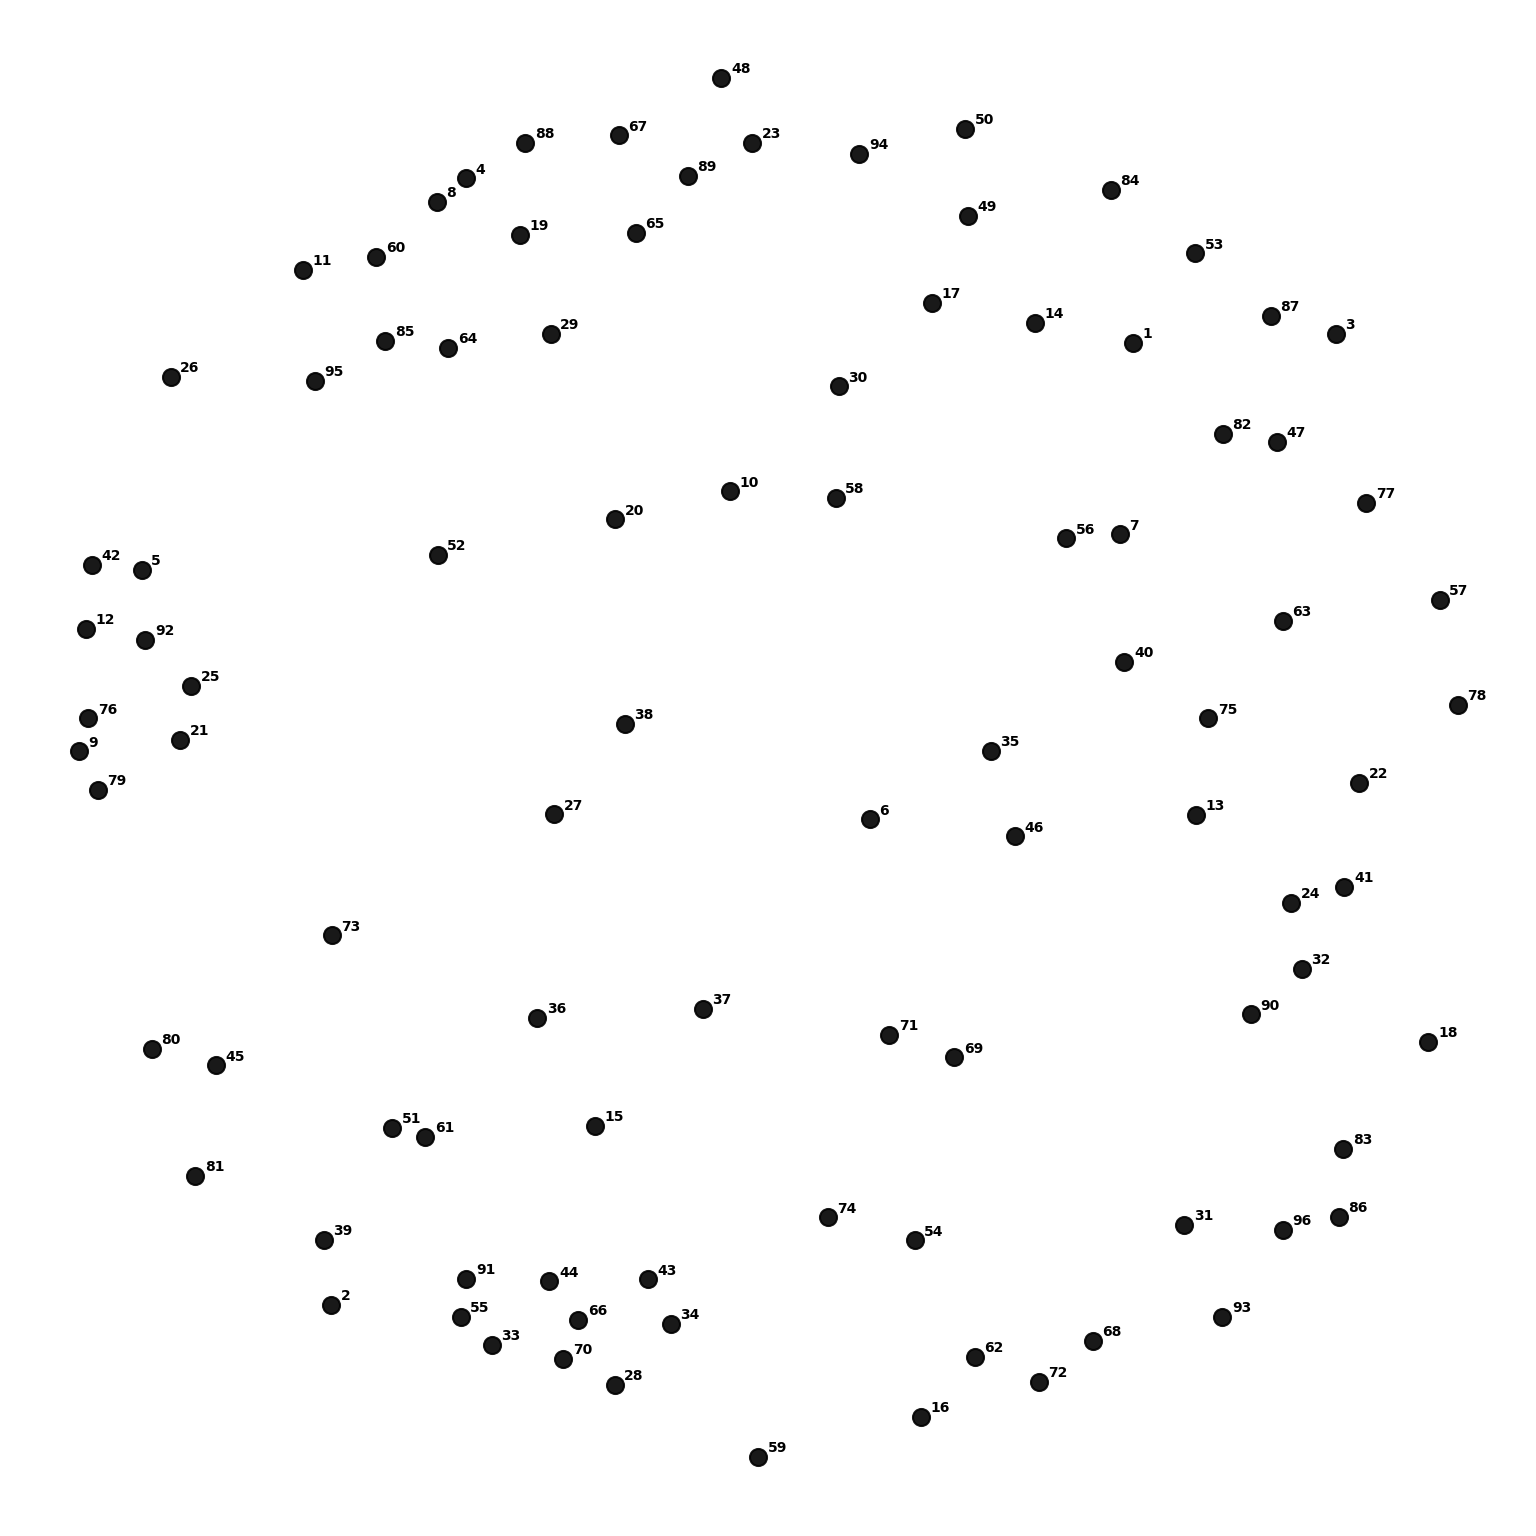

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Plot settings
# plt.style.use('seaborn-whitegrid')  # optional: light gray background for better contrast
plt.rcParams['font.family'] = 'DejaVu Sans'  # readable font

# Load the total matrix
file_path = '/content/total_matrix.csv'
Tij = pd.read_csv(file_path, header=None)

# MDS analysis
# Convert similarity to dissimilarity (distance)
distances = 20 - Tij.values
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(distances)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 16))

# Scatter points (black, bold)
ax.scatter(coords[:, 0], coords[:, 1],
           s=150,          # larger point size
           color='k',      # pure black
           alpha=0.9,      # almost solid
           edgecolor='k',
           linewidth=1.5)

# Add labels (numbers) with a small offset
for i, (x, y) in enumerate(coords):
    offset_x, offset_y = 0.2, 0.2  # fixed offsets, can be adjusted
    ax.text(x + offset_x, y + offset_y,
            str(i+1),
            fontsize=10,
            fontweight='bold',
            color='k',
            va='center')

# Hide axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Adjust margins
plt.tight_layout(pad=3)
plt.show()


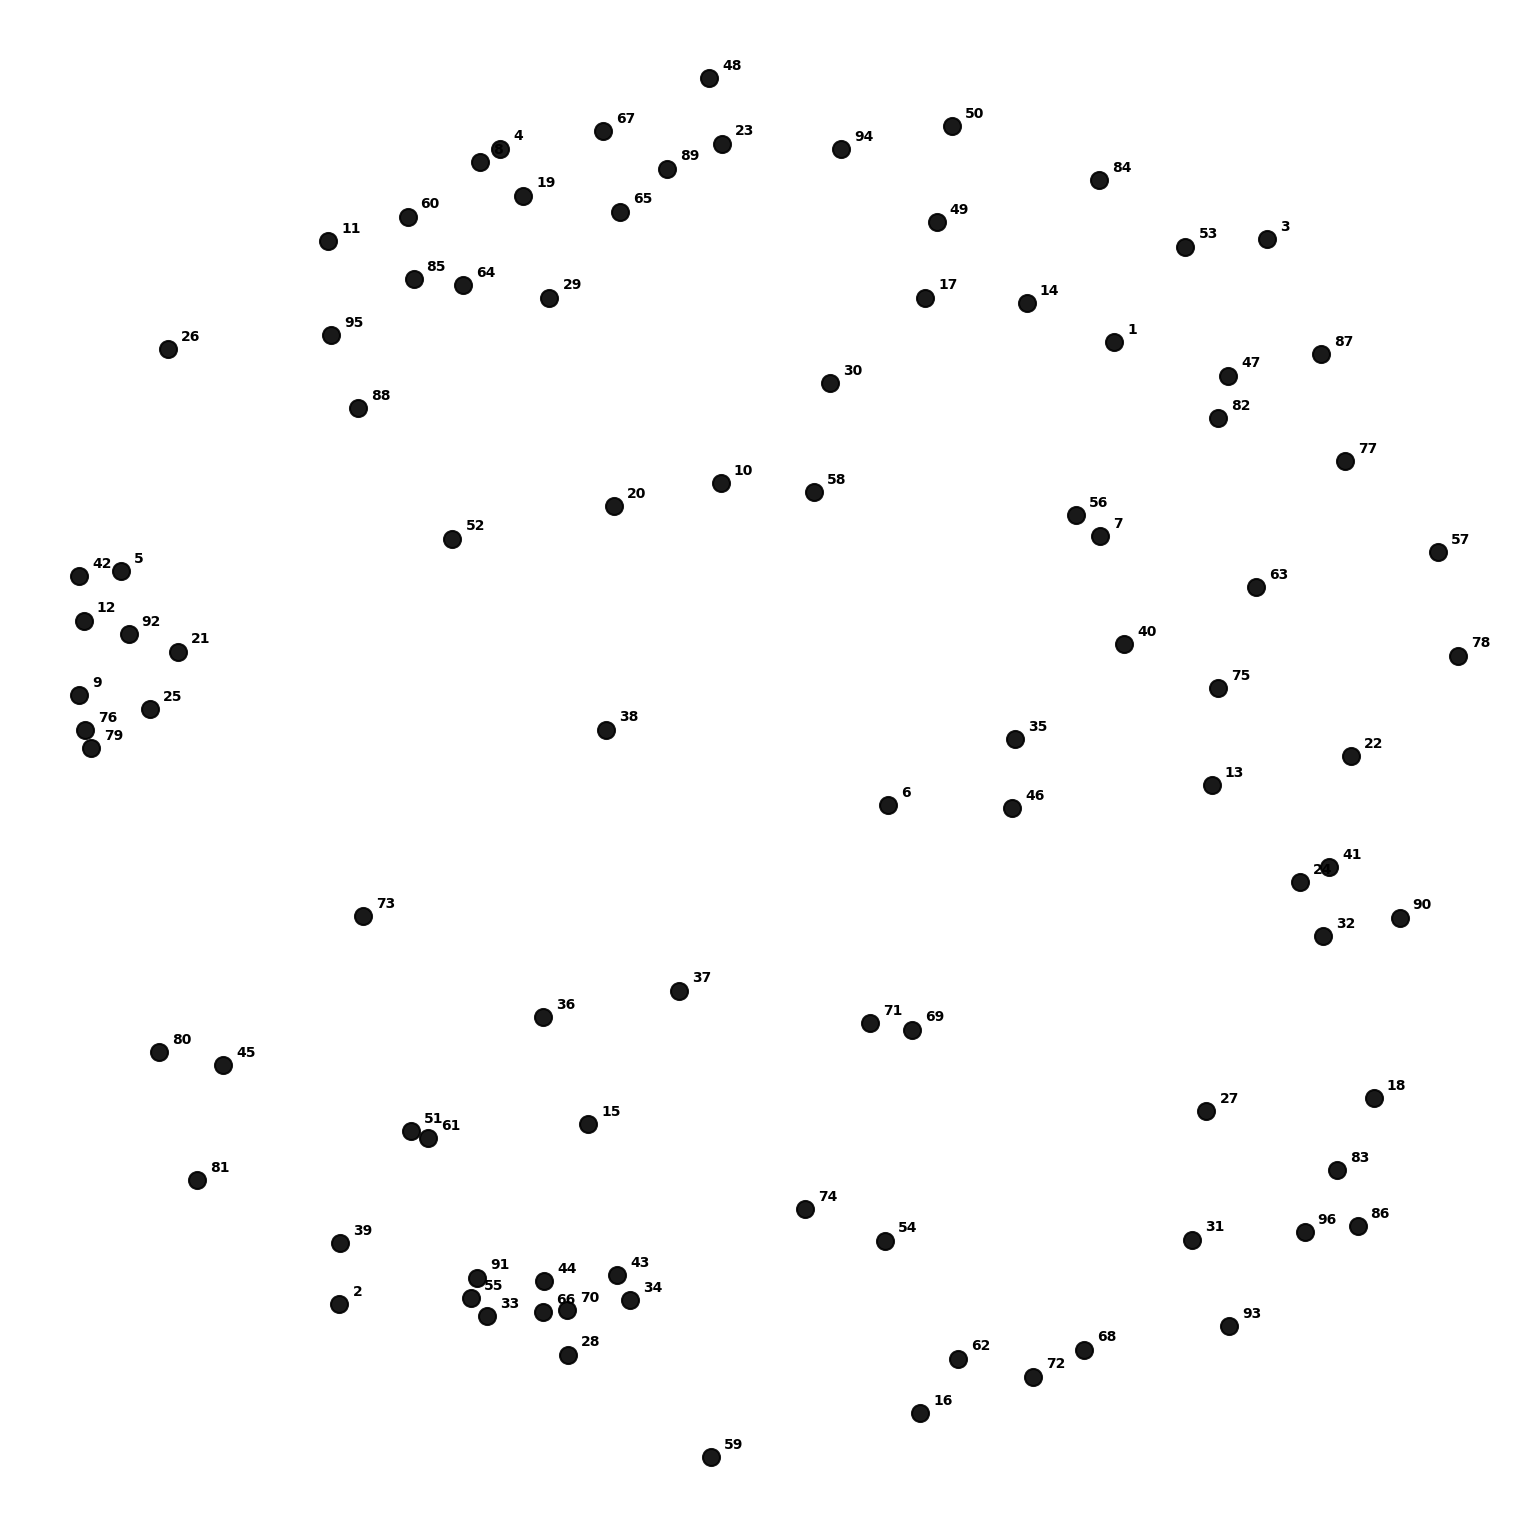

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Plot settings
# plt.style.use('seaborn-whitegrid')  # optional: light gray background
plt.rcParams['font.family'] = 'DejaVu Sans'  # readable font

# Load data
file_path = '/content/total_matrix.csv'
Tij = pd.read_csv(file_path, header=None)

# MDS analysis
# Convert similarity to dissimilarity (distance)
distances = 15 - Tij.values
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(distances)

# Create the plot
fig, ax = plt.subplots(figsize=(16, 16))

# Scatter points (bold black)
ax.scatter(coords[:, 0], coords[:, 1],
           s=150,         # larger points
           color='k',     # pure black
           alpha=0.9,     # almost solid
           edgecolor='k',
           linewidth=1.5)

# Add numeric labels with a small offset
for i, (x, y) in enumerate(coords):
    offset_x, offset_y = 0.2, 0.2  # fixed offsets; adjust if needed
    ax.text(x + offset_x, y + offset_y,
            str(i + 1),
            fontsize=10,
            fontweight='bold',
            color='k',
            va='center')

# Hide axes and frame
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.tight_layout(pad=3)
plt.show()


# More Plot

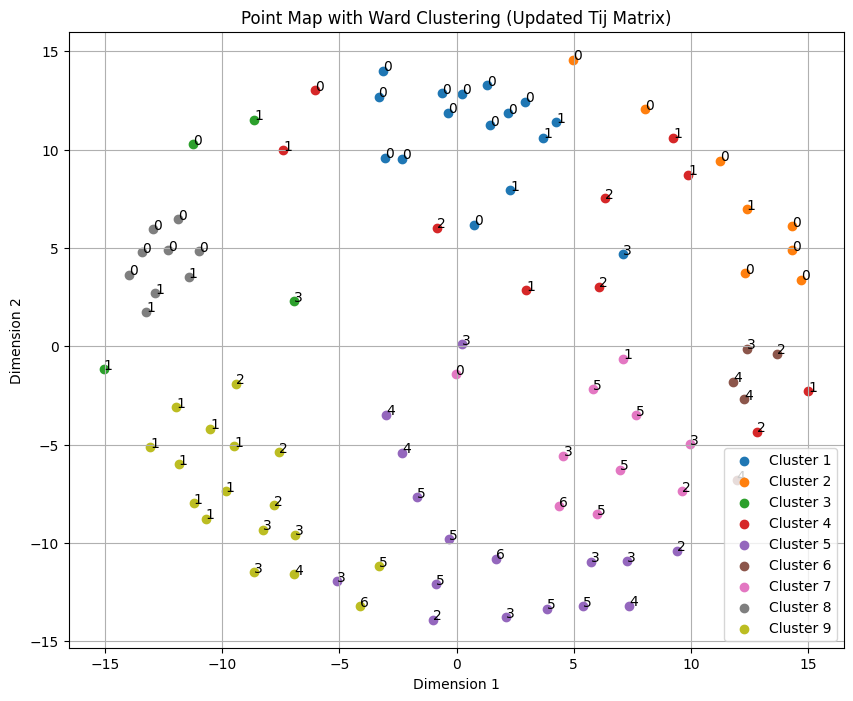

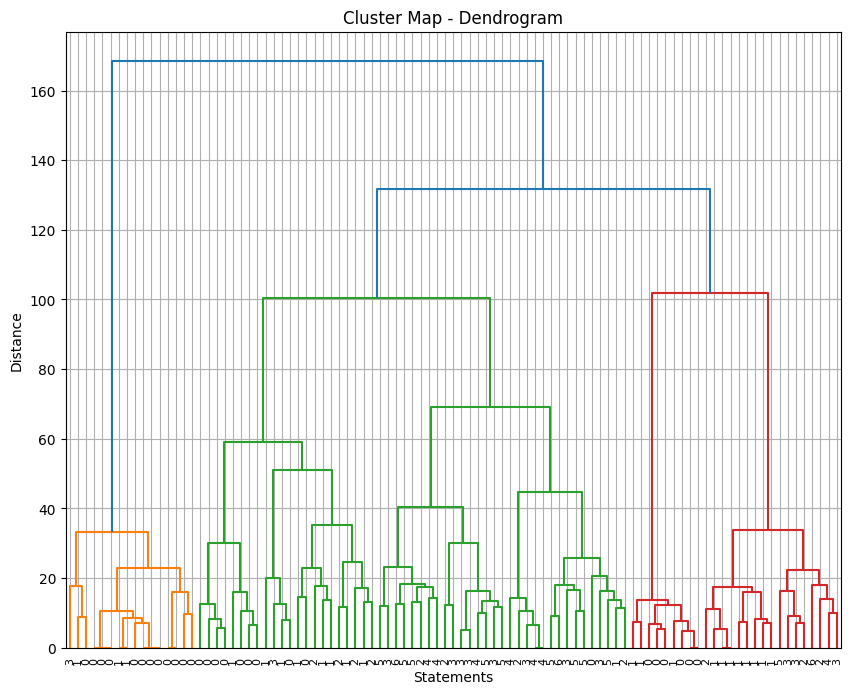

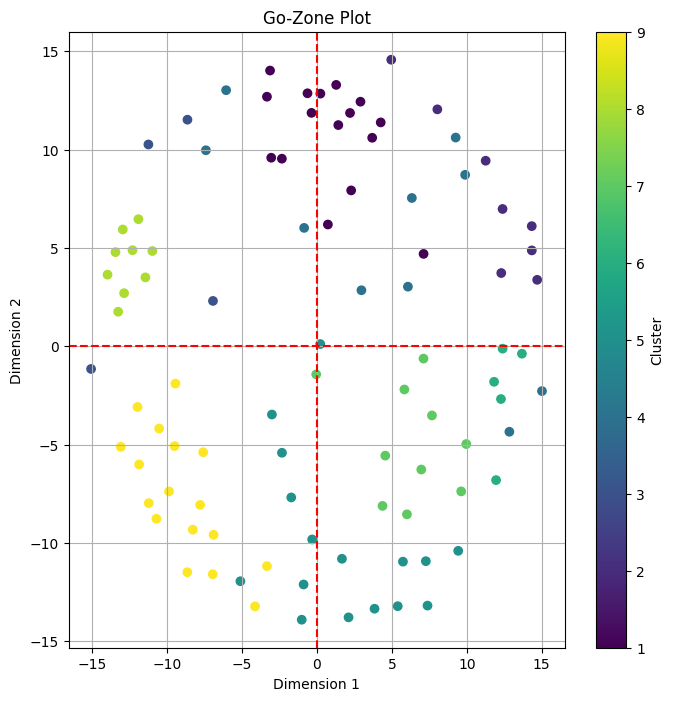

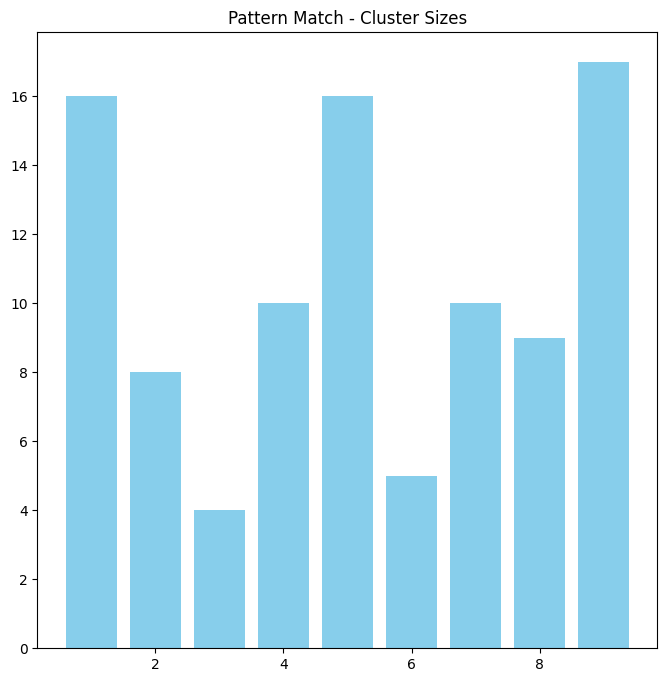

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import ward, fcluster, dendrogram
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

# --- Load the (updated) Tij matrix ---
file_path = '/content/total_matrix.csv'  # update the path if needed

# If your CSV includes a first column with statement labels, use index_col=0.
# If it was saved without headers/index (e.g., via to_csv(..., header=False, index=False)),
# then use header=None and NO index_col.
try:
    Tij_updated = pd.read_csv(file_path, index_col=0)
except Exception:
    Tij_updated = pd.read_csv(file_path, header=None)

# Ensure labels exist (use numeric labels if none present)
if Tij_updated.index.dtype == 'int64' or Tij_updated.index.astype(str).str.isnumeric().all():
    Tij_updated.index = [str(i + 1) for i in range(len(Tij_updated))]

# --- Build a dissimilarity (distance) matrix from similarities ---
# Adjust the constant (here 20) to match your maximum overlap count across matrices.
distances_updated = 20 - Tij_updated.values

# Clamp negatives to zero just in case (keeps distances valid)
distances_updated = np.clip(distances_updated, a_min=0, a_max=None)

# --- MDS (2D) on the precomputed distances ---
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords_updated = mds.fit_transform(distances_updated)

# --- Ward hierarchical clustering ---
# Ward expects a condensed distance vector (1D). Convert the square matrix with squareform.
condensed = squareform(distances_updated, checks=False)
linkage_matrix_updated = ward(condensed)

num_clusters = 9  # set the number of clusters you want
clusters_updated = fcluster(linkage_matrix_updated, num_clusters, criterion='maxclust')

# --- Save cluster assignments ---
cluster_assignments = pd.DataFrame({
    'Statement': Tij_updated.index,
    'Cluster': clusters_updated
})
cluster_assignments.to_csv('cluster_assignments.csv', index=False)

# --- Point Map (MDS scatter colored by cluster) ---
plt.figure(figsize=(10, 8))
for k in range(1, num_clusters + 1):
    mask = (clusters_updated == k)
    plt.scatter(coords_updated[mask, 0], coords_updated[mask, 1], label=f'Cluster {k}', s=70)

# optional labels on points
for i, label in enumerate(Tij_updated.index):
    plt.annotate(label, (coords_updated[i, 0], coords_updated[i, 1]), fontsize=8)

plt.title('Point Map with Ward Clustering (Updated Tij Matrix)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Cluster Map (Dendrogram) ---
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix_updated, labels=Tij_updated.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Cluster Map - Dendrogram')
plt.xlabel('Statements')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# --- Go-Zone Plot (quadrant lines at means) ---
plt.figure(figsize=(8, 8))
sc = plt.scatter(coords_updated[:, 0], coords_updated[:, 1], c=clusters_updated, cmap='viridis', s=70)
plt.axhline(y=np.mean(coords_updated[:, 1]), color='r', linestyle='--', linewidth=1)
plt.axvline(x=np.mean(coords_updated[:, 0]), color='r', linestyle='--', linewidth=1)
plt.title('Go-Zone Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(sc, label='Cluster')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Pattern Match (Cluster Sizes) ---
cluster_sizes = cluster_assignments['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(cluster_sizes.index.astype(int), cluster_sizes.values)
plt.title('Pattern Match - Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Statements')
plt.tight_layout()
plt.show()


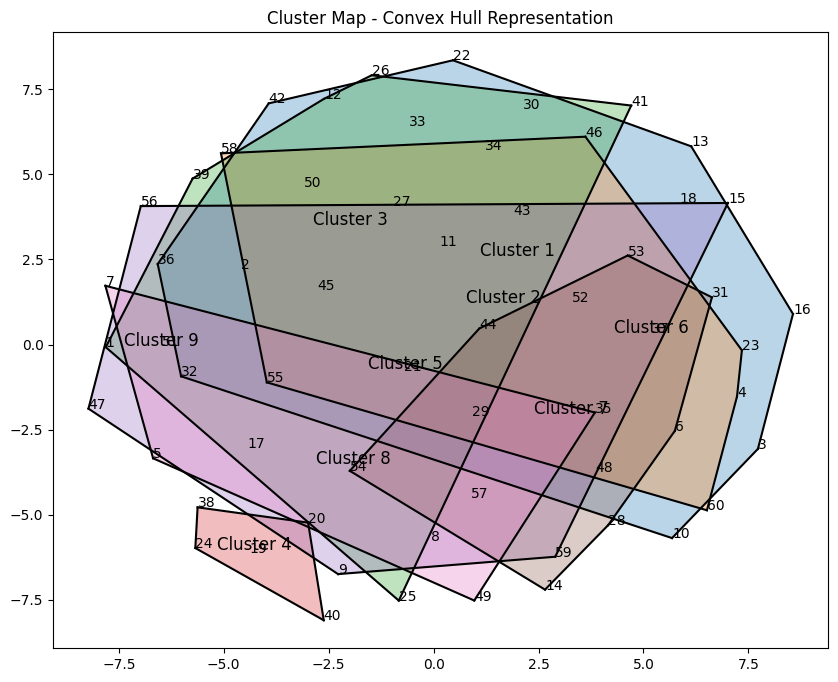

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# رسم نقشه خوشه‌ها
plt.figure(figsize=(10, 8))
for cluster_id in range(1, num_clusters + 1):
    # انتخاب نقاط متعلق به خوشه خاص
    cluster_points = coords_updated[clusters_updated == cluster_id]

    # رسم مرز خوشه‌ها با استفاده از ConvexHull
    if len(cluster_points) > 2:  # شرط لازم برای ایجاد محدوده محدب
        hull = ConvexHull(cluster_points)
        for simplex in hull.simplices:
            plt.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], 'k-')
        plt.fill(cluster_points[hull.vertices, 0], cluster_points[hull.vertices, 1], alpha=0.3)

    # نمایش نام خوشه در مرکز آن
    centroid = cluster_points.mean(axis=0)
    plt.text(centroid[0], centroid[1], f'Cluster {cluster_id}', fontsize=12, ha='center')

# اضافه کردن شماره جملات
for i, txt in enumerate(Tij_updated.index):
    plt.annotate(txt, (coords_updated[i, 0], coords_updated[i, 1]))

plt.title('Cluster Map - Convex Hull Representation')
# plt.xlabel('Dimension 1')
# plt.ylabel('Dimension 2')
# plt.grid(True)
plt.show()


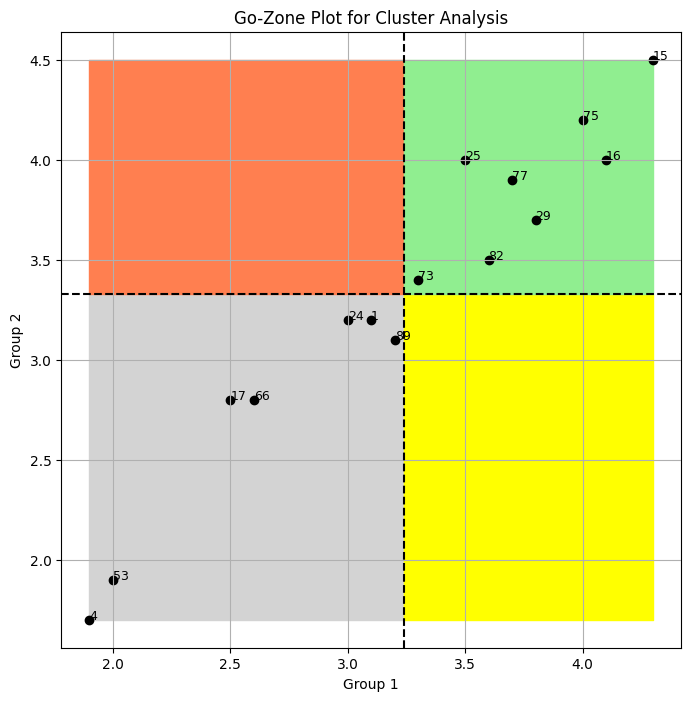

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data
data = {
    'Statement': [1, 4, 15, 16, 17, 24, 25, 29, 53, 66, 73, 75, 77, 82, 89],
    'Group1':    [3.1, 1.9, 4.3, 4.1, 2.5, 3.0, 3.5, 3.8, 2.0, 2.6, 3.3, 4.0, 3.7, 3.6, 3.2],
    'Group2':    [3.2, 1.7, 4.5, 4.0, 2.8, 3.2, 4.0, 3.7, 1.9, 2.8, 3.4, 4.2, 3.9, 3.5, 3.1]
}
df = pd.DataFrame(data)

# Means for quadrant lines
mean_group1 = df['Group1'].mean()
mean_group2 = df['Group2'].mean()

# Plot
plt.figure(figsize=(8, 8))

# Quadrant lines
plt.axvline(x=mean_group1, color='black', linestyle='--', linewidth=1)  # vertical line (x mean)
plt.axhline(y=mean_group2, color='black', linestyle='--', linewidth=1)  # horizontal line (y mean)

# Region shading
plt.fill_betweenx([df['Group2'].min(), mean_group2], df['Group1'].min(), mean_group1, color='lightgrey')  # bottom-left
plt.fill_betweenx([df['Group2'].min(), mean_group2], mean_group1, df['Group1'].max(), color='yellow')     # bottom-right
plt.fill_betweenx([mean_group2, df['Group2'].max()], df['Group1'].min(), mean_group1, color='coral')      # top-left
plt.fill_betweenx([mean_group2, df['Group2'].max()], mean_group1, df['Group1'].max(), color='lightgreen') # top-right

# Points and labels
for g1, g2, stmt in zip(df['Group1'], df['Group2'], df['Statement']):
    plt.scatter(g1, g2, color='black')
    plt.text(g1 + 0.03, g2 + 0.03, str(stmt), fontsize=9)  # small offset

# Titles and axes
plt.title('Go-Zone Plot for Cluster Analysis')
plt.xlabel('Group 1')
plt.ylabel('Group 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
